Theoretical E[Z]      = 0.225400
Simulated  E[Z]      = 21.763214
Theoretical Var(Z)   = 0.021774
Simulated  Var(Z)    = 6474545.373930


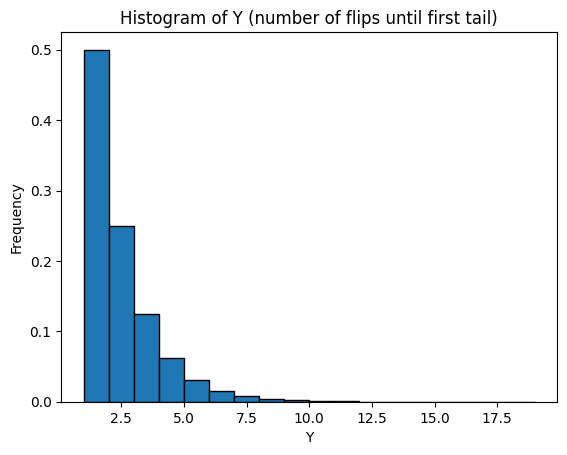

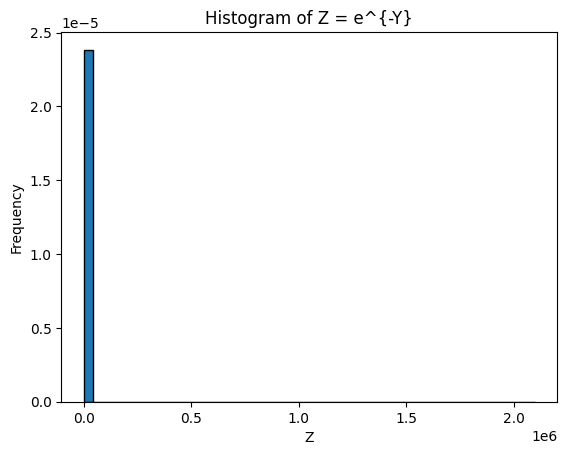

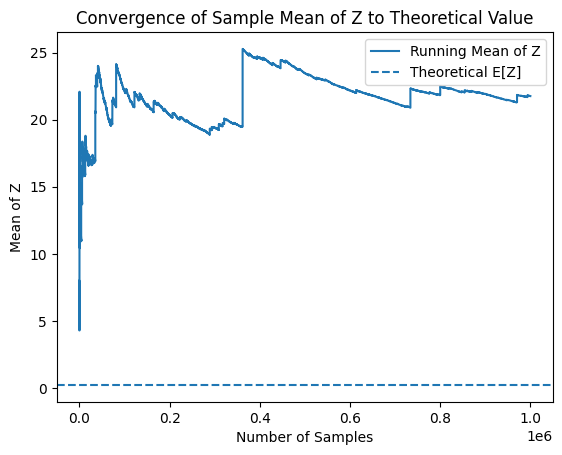

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Suppose we already have Y, Z from the code above
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
n_samples = 10_000_00  # number of samples to draw

# 1) Generate Y using a simple geometric approach
#    "Number of trials until first tail" for a fair coin.
Y = []
for _ in range(n_samples):
    count = 0
    while True:
        count += 1
        flip = np.random.choice([0,1])  # 0=head, 1=tail
        if flip == 1:  # got a tail
            Y.append(count)
            break

Y = np.array(Y)

# 2) Compute Z = e^{-Y}
Z = 0.5 ** -Y

# 3) Sample mean and variance
sample_mean = np.mean(Z)
sample_var  = np.var(Z, ddof=1)  # unbiased estimator

# 4) Theoretical values (we derived above)
#    For p=1/2:
E_Z_theory = np.exp(-1) / (2 - np.exp(-1))
E_Z2_theory = (0.5 * np.exp(-2)) / (1 - 0.5 * np.exp(-2))
Var_Z_theory = E_Z2_theory - E_Z_theory**2

print(f"Theoretical E[Z]      = {E_Z_theory:.6f}")
print(f"Simulated  E[Z]      = {sample_mean:.6f}")
print(f"Theoretical Var(Z)   = {Var_Z_theory:.6f}")
print(f"Simulated  Var(Z)    = {sample_var:.6f}")


# 1) Histogram of Y
plt.figure()
plt.hist(Y, bins=range(1, 20), edgecolor='black', density=True)
plt.title("Histogram of Y (number of flips until first tail)")
plt.xlabel("Y")
plt.ylabel("Frequency")
plt.show()

# 2) Histogram of Z = e^{-Y}
plt.figure()
plt.hist(Z, bins=50, edgecolor='black', density=True)
plt.title("Histogram of Z = e^{-Y}")
plt.xlabel("Z")
plt.ylabel("Frequency")
plt.show()

# 3) Running estimate of E[Z]
running_means = np.cumsum(Z) / (np.arange(len(Z)) + 1)
plt.figure()
plt.plot(running_means, label="Running Mean of Z")
plt.axhline(E_Z_theory, linestyle="--", label="Theoretical E[Z]")
plt.title("Convergence of Sample Mean of Z to Theoretical Value")
plt.xlabel("Number of Samples")
plt.ylabel("Mean of Z")
plt.legend()
plt.show()
